survived_male_childern: 23
male_children_survival_rate: 0.39655172413793105


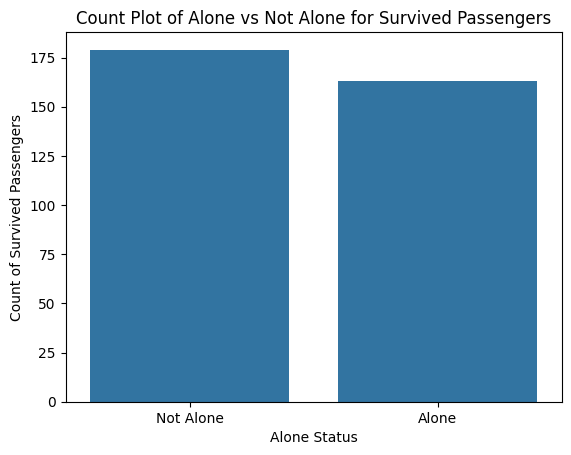

Average age by deck: Deck
A    44.833333
B    34.955556
C    36.086667
D    39.032258
E    38.116667
F    19.954545
G    14.750000
T    45.000000
Name: Age, dtype: float64
youngest_passengers:      PassengerId  Survived  Pclass                             Name   Sex  \
305          306         1       1   Allison, Master. Hudson Trevor  male   
755          756         1       2        Hamalainen, Master. Viljo  male   
803          804         1       3  Thomas, Master. Assad Alexander  male   

      Age  SibSp  Parch  Ticket      Fare    Cabin Embarked  Alone  \
305  0.92      1      2  113781  151.5500  C22 C26        S  False   
755  0.67      1      1  250649   14.5000      NaN        S  False   
803  0.42      0      1    2625    8.5167      NaN        C  False   

    Alone_Status Deck  
305    Not Alone    C  
755    Not Alone  NaN  
803    Not Alone  NaN  
youngest_passenger_info:      Pclass   Age  Survived
305       1  0.92         1
755       2  0.67         1
803       3 

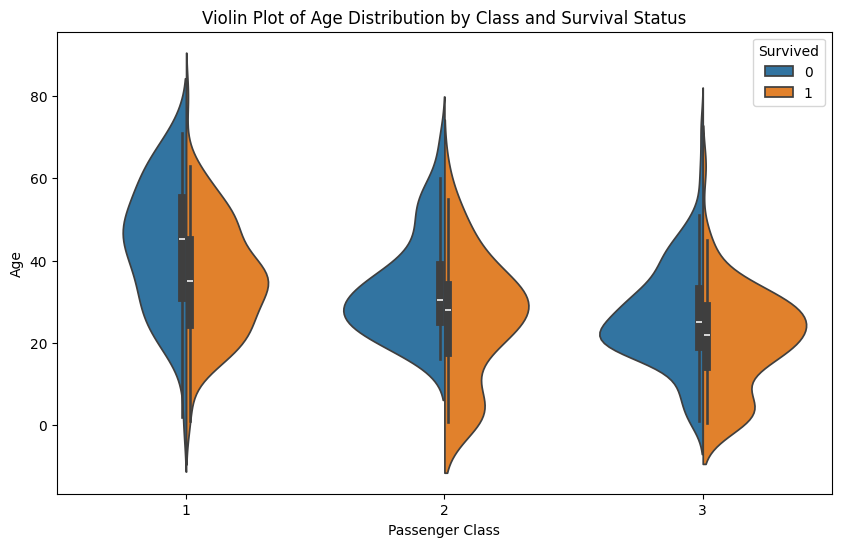

Survival rate for passengers aged between 30 and 40 is: 0.4388888888888889


In [19]:
# Required libraries for analyzing this project

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing 'train data' from titanic data set

train_data = pd.read_csv('train.csv')
train_data.head()# First few row of train data


#1 counting number of male survival whos age under 18 considered as childeren
survived_male_childern = train_data[(train_data['Sex'] == 'male') & (train_data['Age'] < 18) & (train_data['Survived'] == 1)].shape[0]
print("survived_male_childern:", survived_male_childern)

# Calculate the total number of male children
total_male_children = train_data[(train_data['Sex'] == 'male') & (train_data['Age'] < 18)].shape[0]

# Calculate the survival rate
male_children_survival_rate = survived_male_childern / total_male_children
print("male_children_survival_rate:", male_children_survival_rate)

#2.analyzing plot where passenger are alone against survived as hue

alone= train_data['Alone'] = (train_data['SibSp'] + train_data['Parch']) == 0
train_data['Alone_Status'] = train_data['Alone'].map({True: 'Alone', False: 'Not Alone'})
survived_passengers = train_data[train_data['Survived'] == 1]
sns.countplot(x='Alone_Status', data=survived_passengers)
plt.xlabel('Alone Status')
plt.ylabel('Count of Survived Passengers')
plt.title('Count Plot of Alone vs Not Alone for Survived Passengers')
plt.show()

#3 Now calculating average age of passenger in each deck
train_data['Deck'] = train_data['Cabin'].str[0]
average_age_by_deck = train_data.groupby('Deck')['Age'].mean()
print("Average age by deck:",average_age_by_deck)

#4 analyzing youngest passenger in each class and determine their survival status
youngest_passengers = train_data.loc[train_data.groupby('Pclass')['Age'].idxmin()]
print("youngest_passengers:",youngest_passengers)
youngest_passenger_info = youngest_passengers[['Pclass', 'Age', 'Survived']]
print("youngest_passenger_info:",youngest_passenger_info)

#5 creating a violin plot for age distribution by class and survival status
plt.figure(figsize=(10, 6))
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=train_data, split=True)
plt.title('Violin Plot of Age Distribution by Class and Survival Status')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()

# Analyzing the survival rate for passengers aged between 30 and 40.
age_group = train_data[(train_data['Age'] >= 30) & (train_data['Age'] <= 40)]
survival_rate = age_group['Survived'].mean()
print("Survival rate for passengers aged between 30 and 40 is:", survival_rate)